In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import sys

In [74]:
dic_path = "/home/yiheng/Projects/colmap_dic/training/Truck/dense/ibr3d_pw_0.50/"

# dic_path = "/home/yiheng/Projects/colmap_dic/training/Barn/dense/ibr3d_pw_0.25/"

In [76]:
idx = "00000012"

In [54]:
carla_path = "/home/yiheng/dataset/carla/carla_scene1_city/"

In [56]:
carla_idx = "0000000012"

## Original dataset
### 1. im_xxxxxxxx.jpg
**0 - 255 int**

the downsampled images used as source images, or as target images

(546, 980, 3)


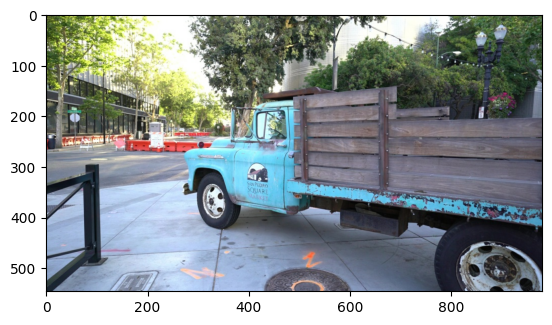

In [5]:
data1 = cv2.imread(dic_path + "im_" + idx + ".jpg")
data1 = cv2.cvtColor(data1, cv2.COLOR_BGR2RGB)
print(data1.shape)
plt.imshow(data1);

(376, 1241, 3)


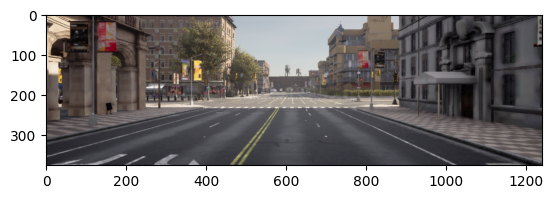

In [73]:
# carla1 = cv2.imread(carla_path + "image_2/" +  carla_idx + ".png")
carla1 = cv2.imread("/home/yiheng/carlaDatasetTools/raw_data/record_2023_0327_0044/vehicle.tesla.model3.master/image_2/0000000009.png")
carla1 = cv2.cvtColor(carla1, cv2.COLOR_BGR2RGB)
print(carla1.shape)
plt.imshow(carla1);

### 2. dm_xxxxxxxx.npy

**scale: m, float**

the rendered depthmaps based on the COLMAP surface reconstruction

(546, 980)
0.0 55.43125


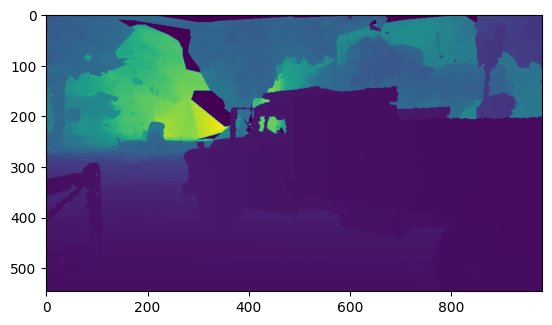

In [6]:
data2 = np.load(dic_path + "dm_" + idx + ".npy", allow_pickle=True)
print(data2.shape)
print(data2.min(), data2.max())
plt.imshow(data2);

(376, 1241)
5.7179335187633935 60.0


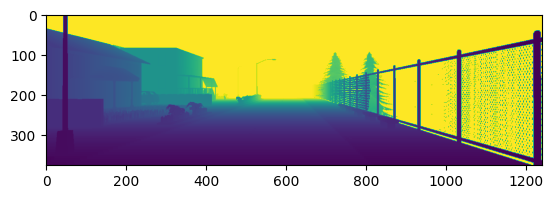

In [254]:
depth_map = np.load("/home/yiheng/Projects/colmap_dic/training/Carla_blank/dense/ibr3d_pw_0.50/dm_00000002.npy", allow_pickle=True)
print(depth_map.shape)
print(depth_map.min(), depth_map.max())
plt.imshow(depth_map)


In [10]:
data2[500][200]

2.566818

In [11]:
data2[500][202]

2.5657783

In [7]:
print(data2.min(), data2.max())

0.0 55.43125


In [13]:
carla2 = cv2.imread("/home/yiheng/Surfel/dataset/carla_vis_demo/depth_2/0000000000.png", cv2.IMREAD_GRAYSCALE)
print(carla2.shape, carla2.min(), carla2.max())

(376, 1241) 22 234


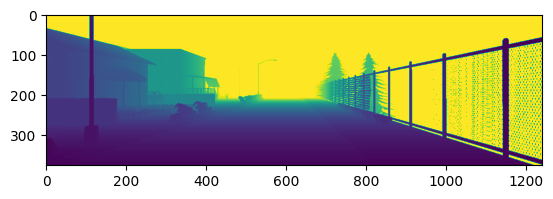

In [19]:
plt.imshow(carla2);

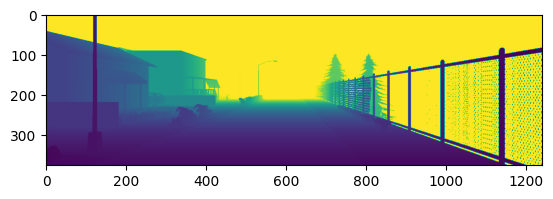

In [21]:
plt.imshow(depth);

In [28]:
78 / 22.298516172082195

3.497990601619323

In [29]:
36 / 10.518074662570635

3.422679640039895

In [14]:
test = carla2.astype(np.float64)

In [15]:
test2 = cv2.imread("/home/yiheng/Surfel/carlaDatasetTools/raw_data/record_2023_0424_1647/vehicle.tesla.model3.master/depth_2/0000000007.png")
print(test2.shape, test2.min(), test2.max())

depth_bgr = test2.astype(np.float64)
depth = depth_bgr[:,:,2] + depth_bgr[:,:,1]*256 + depth_bgr[:,:,0]*256*256
depth = depth / (256 * 256 * 256 - 1)
depth = depth * 1000                        # meter
depth = np.clip(depth, 0, 60)
print(depth.min(), depth.max())

(376, 1241, 3) 0 255
5.748331889410728 60.0


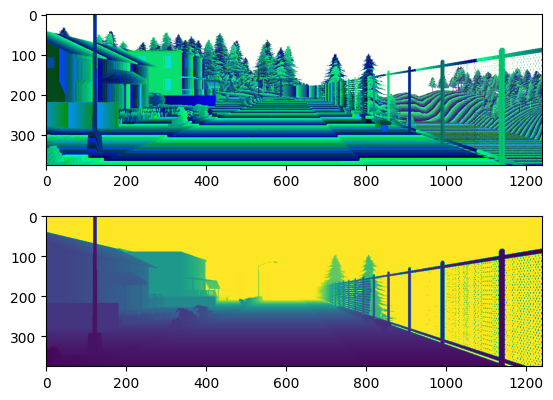

In [10]:
plt.subplot(211)
plt.imshow(test2);

plt.subplot(212)
plt.imshow(depth);

(376, 1241, 3)


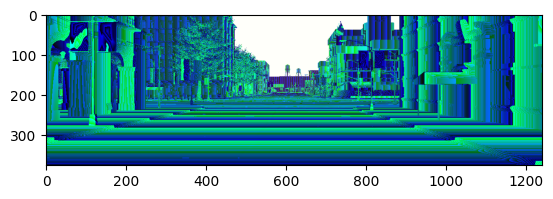

In [91]:
# carla2 = cv2.imread(carla_path + "depth_2/" + carla_idx + ".png")
carla2 = cv2.imread("/home/yiheng/carlaDatasetTools/raw_data/record_2023_0327_0044/vehicle.tesla.model3.master/depth_2/0000000009.png")
# carla2 = cv2.cvtColor(carla2, cv2.COLOR_BGR2GRAY)
print(carla2.shape)
plt.imshow(carla2);

In [97]:
depth_bgr = carla2.astype(np.float64)
depth = depth_bgr[:,:,2] + depth_bgr[:,:,1]*256 + depth_bgr[:,:,0]*256*256
depth = depth / (256 * 256 * 256 - 1)
depth = depth * 1000                        # meter
depth = np.clip(depth, 0, 60)

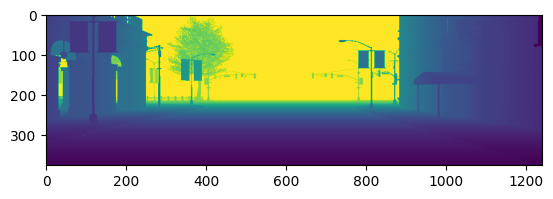

In [98]:
plt.imshow(depth);

In [114]:
depth[77][1228]

7.334650000014901

In [111]:
depth.argmin()

96785

In [113]:
96785 - 77 * 1241

1228

In [108]:
print(depth.min(), depth.max())

7.334650000014901 60.0


7334 60000


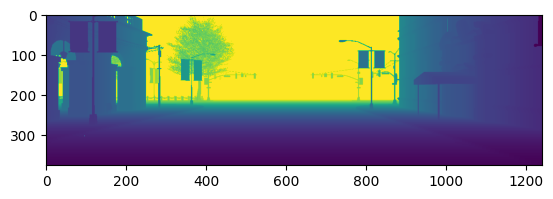

In [115]:
depth = depth * 1000                        # milimeter
depth = depth.astype(np.uint16)
print(depth.min(), depth.max())
plt.imshow(depth);

In [116]:
cv2.imwrite("test_depth.png", depth)

True

(512, 1382)


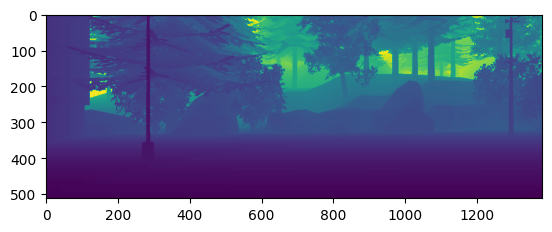

In [69]:
carla2 = cv2.imread("/home/yiheng/dataset/carla/spawn04/depth_2/0000000000.png")
carla2 = cv2.cvtColor(carla2, cv2.COLOR_BGR2GRAY)
print(carla2.shape)
plt.imshow(carla2);

In [117]:
test_depth = cv2.imread("test_depth.png")

In [119]:
test_depth.min()

28

In [71]:
carla2

array([[50, 50, 50, ..., 95, 95, 94],
       [50, 50, 50, ..., 97, 97, 97],
       [50, 50, 50, ..., 97, 97, 97],
       ...,
       [21, 21, 21, ..., 20, 20, 20],
       [21, 21, 21, ..., 20, 20, 20],
       [21, 21, 21, ..., 20, 20, 20]], dtype=uint8)

In [72]:
carla2.max()

234

### 3. count_xxxxxxxx.npy

contains the overlap information from target images to source images. I.e., the number of pixels that can be mapped from the target image to the individual source images. np.argsort(np.load('count_00000000.npy'))[::-1] will give you the sorted indices of the most overlapping source images.

In [77]:
data3 = np.load(dic_path + "count_" + idx + ".npy", allow_pickle=True)
print(data3.shape)

(251,)


In [80]:
data3

array([401782, 411010, 456626, 453840, 457200, 428035, 400085, 401057,
       375239, 391233, 424726, 498857,      0, 457691, 407817, 343720,
       292116, 252347, 228888, 215611, 191174, 151903, 129871, 127375,
       129936, 125534, 130409, 130358, 131594, 136819, 143786, 152533,
       166620, 173028, 188617, 210895, 238047, 255393, 269130, 284876,
       300406, 316125, 316975, 278511, 238457, 214735, 210432, 209434,
       213416, 223917, 224803, 225942, 221668, 222125, 220942, 219994,
       213019, 134652,  90171,  67379,  59703,  51972,  41500,  46536,
        43546,  40969,  42096,  33001,  24809,  20309,  16511,  19331,
        24685,  30630,  35898,  41419,  48233,  53312,  59362,  65674,
        67935,  61511,  51929,  48170,  42941,  36694,  29429,  23803,
        18278,  14916,  13476,  13803,  17963,  25021,  30887,  38743,
        39546,  45348,  54180,  58455,  63449,  64980,  64918,  69703,
        75175,  75859,  78051,  77950,  87538, 105065, 128257, 148585,
      

In [78]:
data3[0]

401782

In [79]:
np.argsort(data3)[::-1]

array([ 11,  13,   4,   2,   3,   5,  10, 199, 136,   1,  14, 198,   0,
         7,   6, 128,   9, 200, 197, 137, 135, 129, 127,   8, 196, 138,
       126,  15, 195, 134, 132, 131, 133, 130,  42,  41, 125,  40, 139,
       194,  16, 201,  39, 124, 123,  43,  38,  37, 207,  17, 210, 208,
       209, 211, 140,  44,  36, 212, 193,  18,  51,  50, 222,  49, 223,
       224,  53,  52,  54,  55, 122, 221,  19, 225,  45, 213,  48,  56,
        35,  46,  47, 214, 141, 192,  20,  34, 206, 152, 151, 191, 142,
        33, 150,  32, 202, 149, 115, 118, 112, 190, 113, 117,  31,  21,
       114, 116, 111, 119, 120,  30, 148, 143, 226, 153,  29,  57, 182,
       121,  28, 183,  26,  27,  24,  22, 110,  23, 181, 147, 144,  25,
       205, 215, 184, 146, 145, 185, 180, 109, 186, 179, 187, 227,  58,
       154, 108, 220, 178, 188, 106, 107, 216, 105, 155, 104, 203, 250,
       189, 177, 103, 249, 228,  80,  59, 217,  79, 101, 102, 100, 204,
       156,  81, 248,  60,  78, 219,  99, 247, 229, 218, 176,  9

### 4. Ks.npy

contains the 3x3 intrinsic camera matrices, where Ks[idx] corresponds to the depth map dm_{idx:08d}.npy

In [130]:
testKs = np.load('/home/yiheng/Projects/colmap_dic/training/Truck/dense/ibr3d_pw_0.25/Ks.npy', allow_pickle=True)
print(testKs)

[[[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]

 [[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]

 [[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]

 ...

 [[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]

 [[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]

 [[290.89386595   0.         245.125     ]
  [  0.         290.89386595 136.375     ]
  [  0.           0.           1.        ]]]


In [87]:
dic_path

'/home/yiheng/Projects/colmap_dic/training/Truck/dense/ibr3d_pw_0.50/'

In [84]:
data4 = np.load(dic_path + "Ks.npy", allow_pickle=True)
print(data4.shape)

(251, 3, 3)


In [86]:
data4

array([[[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]],

       [[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]],

       [[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]],

       ...,

       [[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]],

       [[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]],

       [[581.78773191,   0.        , 490.25      ],
        [  0.        , 581.78773191, 272.75      ],
        [  0.        ,   0.        ,   1.        ]]])

In [85]:
data4[0] == data4[100]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [205]:
your_matrix

array([[[620.5,   0. , 620.5],
        [  0. , 620.5, 188. ],
        [  0. ,   0. ,   1. ]]])

In [93]:
your_matrix = np.array([[[620.5, 0, 620.5], [0, 620.5, 188.0], [0, 0, 1]]])

desired_shape = (201, 3, 3)

reshaped_matrix = np.resize(your_matrix, desired_shape)

print(reshaped_matrix.shape)

(201, 3, 3)


In [96]:
path = generated_data_dic_path + "Ks.npy"
print(path)
np.save(path, reshaped_matrix)

/home/yiheng/Projects/colmap_dic/training/Carla_blank/Ks.npy


### 5. Rs.npy

In [250]:
data5 = np.load(dic_path + "Rs.npy", allow_pickle=True)
print(data5.shape)

(251, 3, 3)


In [251]:
print(data5[0])
print(data5[10])

[[ 0.99691859  0.00879406  0.07794859]
 [-0.00829108  0.99994268 -0.00677394]
 [-0.0780037   0.00610678  0.99693437]]
[[ 0.99980268 -0.01776724  0.00888449]
 [ 0.0176419   0.99974646  0.01399199]
 [-0.00913084 -0.01383249  0.99986264]]


In [252]:
rotation = np.load("/home/yiheng/Projects/colmap_dic/training/Carla_blank/dense/ibr3d_pw_0.50/Rs.npy", allow_pickle=True)

In [253]:
print(rotation[0], rotation[10])

[[ 1.30607315e-03 -1.71358598e-03 -9.99997679e-01]
 [ 9.99999146e-01  3.68590885e-05  1.30601191e-03]
 [ 3.46210393e-05 -9.99998531e-01  1.71363266e-03]] [[ 7.63734816e-03 -1.13132099e-03 -9.99970195e-01]
 [ 9.99970835e-01  1.66302494e-05  7.63733424e-03]
 [ 7.98947714e-06 -9.99999360e-01  1.13141501e-03]]


### 6. ts.npy

In [236]:
data6 = np.load(dic_path + "ts.npy", allow_pickle=True)
print(data6.shape)

(251, 3)


In [237]:
print(data6[0])
print(data6[-1])

[-1.15893849 -0.45901755  3.91884407]
[-0.21819416 -1.00544426  5.04831389]


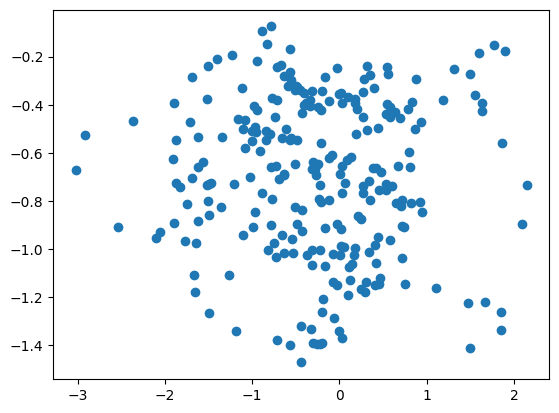

In [249]:
plt.scatter(data6[:, 0], data6[:, 1])

In [240]:
pose = np.load("/home/yiheng/Projects/colmap_dic/training/Carla_blank/dense/ibr3d_pw_0.50/ts.npy", allow_pickle=True)

In [241]:
print(pose[0], pose[-1])

[61.99692917  1.9644767   2.00170851] [  -1.99390256 -214.58030701    2.00187445]


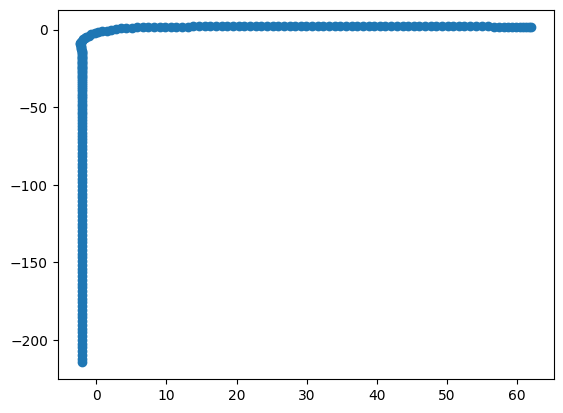

In [248]:
plt.scatter(pose[:, 0], pose[:, 1]);

TypeError: list indices must be integers or slices, not tuple

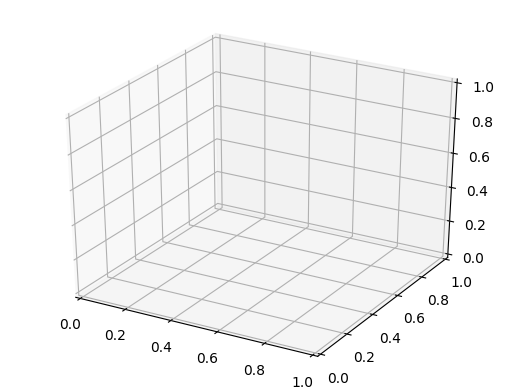

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 坐标点数组
points = translation_vectors

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

### 7. counts.npy

In [208]:
data7 = np.load(dic_path + "counts.npy", allow_pickle=True)
print(data7.shape)

(251, 251)


In [209]:
data7

array([[     0, 527159, 499123, ...,  95514, 103652, 102801],
       [492778,      0, 497807, ...,  92037, 100290,  99637],
       [430436, 455553,      0, ...,  82380,  91246,  91444],
       ...,
       [ 53397,  55356,  57746, ...,      0, 481468, 458700],
       [ 50854,  52763,  55477, ..., 423435,      0, 500085],
       [ 50019,  51895,  54648, ..., 392943, 485775,      0]], dtype=int32)

In [235]:
import numpy as np

# 创建一个200行200列的全零矩阵
confusion_matrix = np.zeros((200, 200))

# 打开文本文件
with open('/home/yiheng/Surfel/dataset/colmap1/export.txt', 'r') as file:
    # 逐行读取文件内容
    for line in file:
        # 解析文件名和数值
        filename1, filename2, value = line.split()
        
        # 将文件名转换为对应的行索引和列索引
        row_index = int(filename1[:-4]) - 1
        col_index = int(filename2[:-4]) - 1
        
        # 将数值存储到混淆矩阵的相应位置
        confusion_matrix[row_index, col_index] = int(value)

# 补全矩阵
confusion_matrix = confusion_matrix + confusion_matrix.T - np.diag(confusion_matrix.diagonal())

# 创建一个201行201列的全零矩阵
extended_matrix = np.zeros((201, 201))

# 将原始200x200的混淆矩阵复制到新矩阵的右下角
extended_matrix[1:, 1:] = confusion_matrix

# 在新矩阵的第一列和第一行分别添加一行和一列
# extended_matrix[0, 1:] = np.mean(confusion_matrix, axis=0)
# extended_matrix[1:, 0] = np.mean(confusion_matrix, axis=1)
extended_matrix[0, 1] = 1251
extended_matrix[1, 0] = 1251

# 将新矩阵的对角线上的元素设置为0
np.fill_diagonal(extended_matrix, 0)

# 取整数
extended_matrix = np.round(extended_matrix).astype(int)

# 输出扩展后的混淆矩阵
print(extended_matrix)

# 保存混淆矩阵为npy文件
np.save('confusion_matrix.npy', extended_matrix)


[[   0 1251    0 ...    0    0    0]
 [1251    0 1305 ...    0    0    0]
 [   0 1305    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0  917  531]
 [   0    0    0 ...  917    0  868]
 [   0    0    0 ...  531  868    0]]


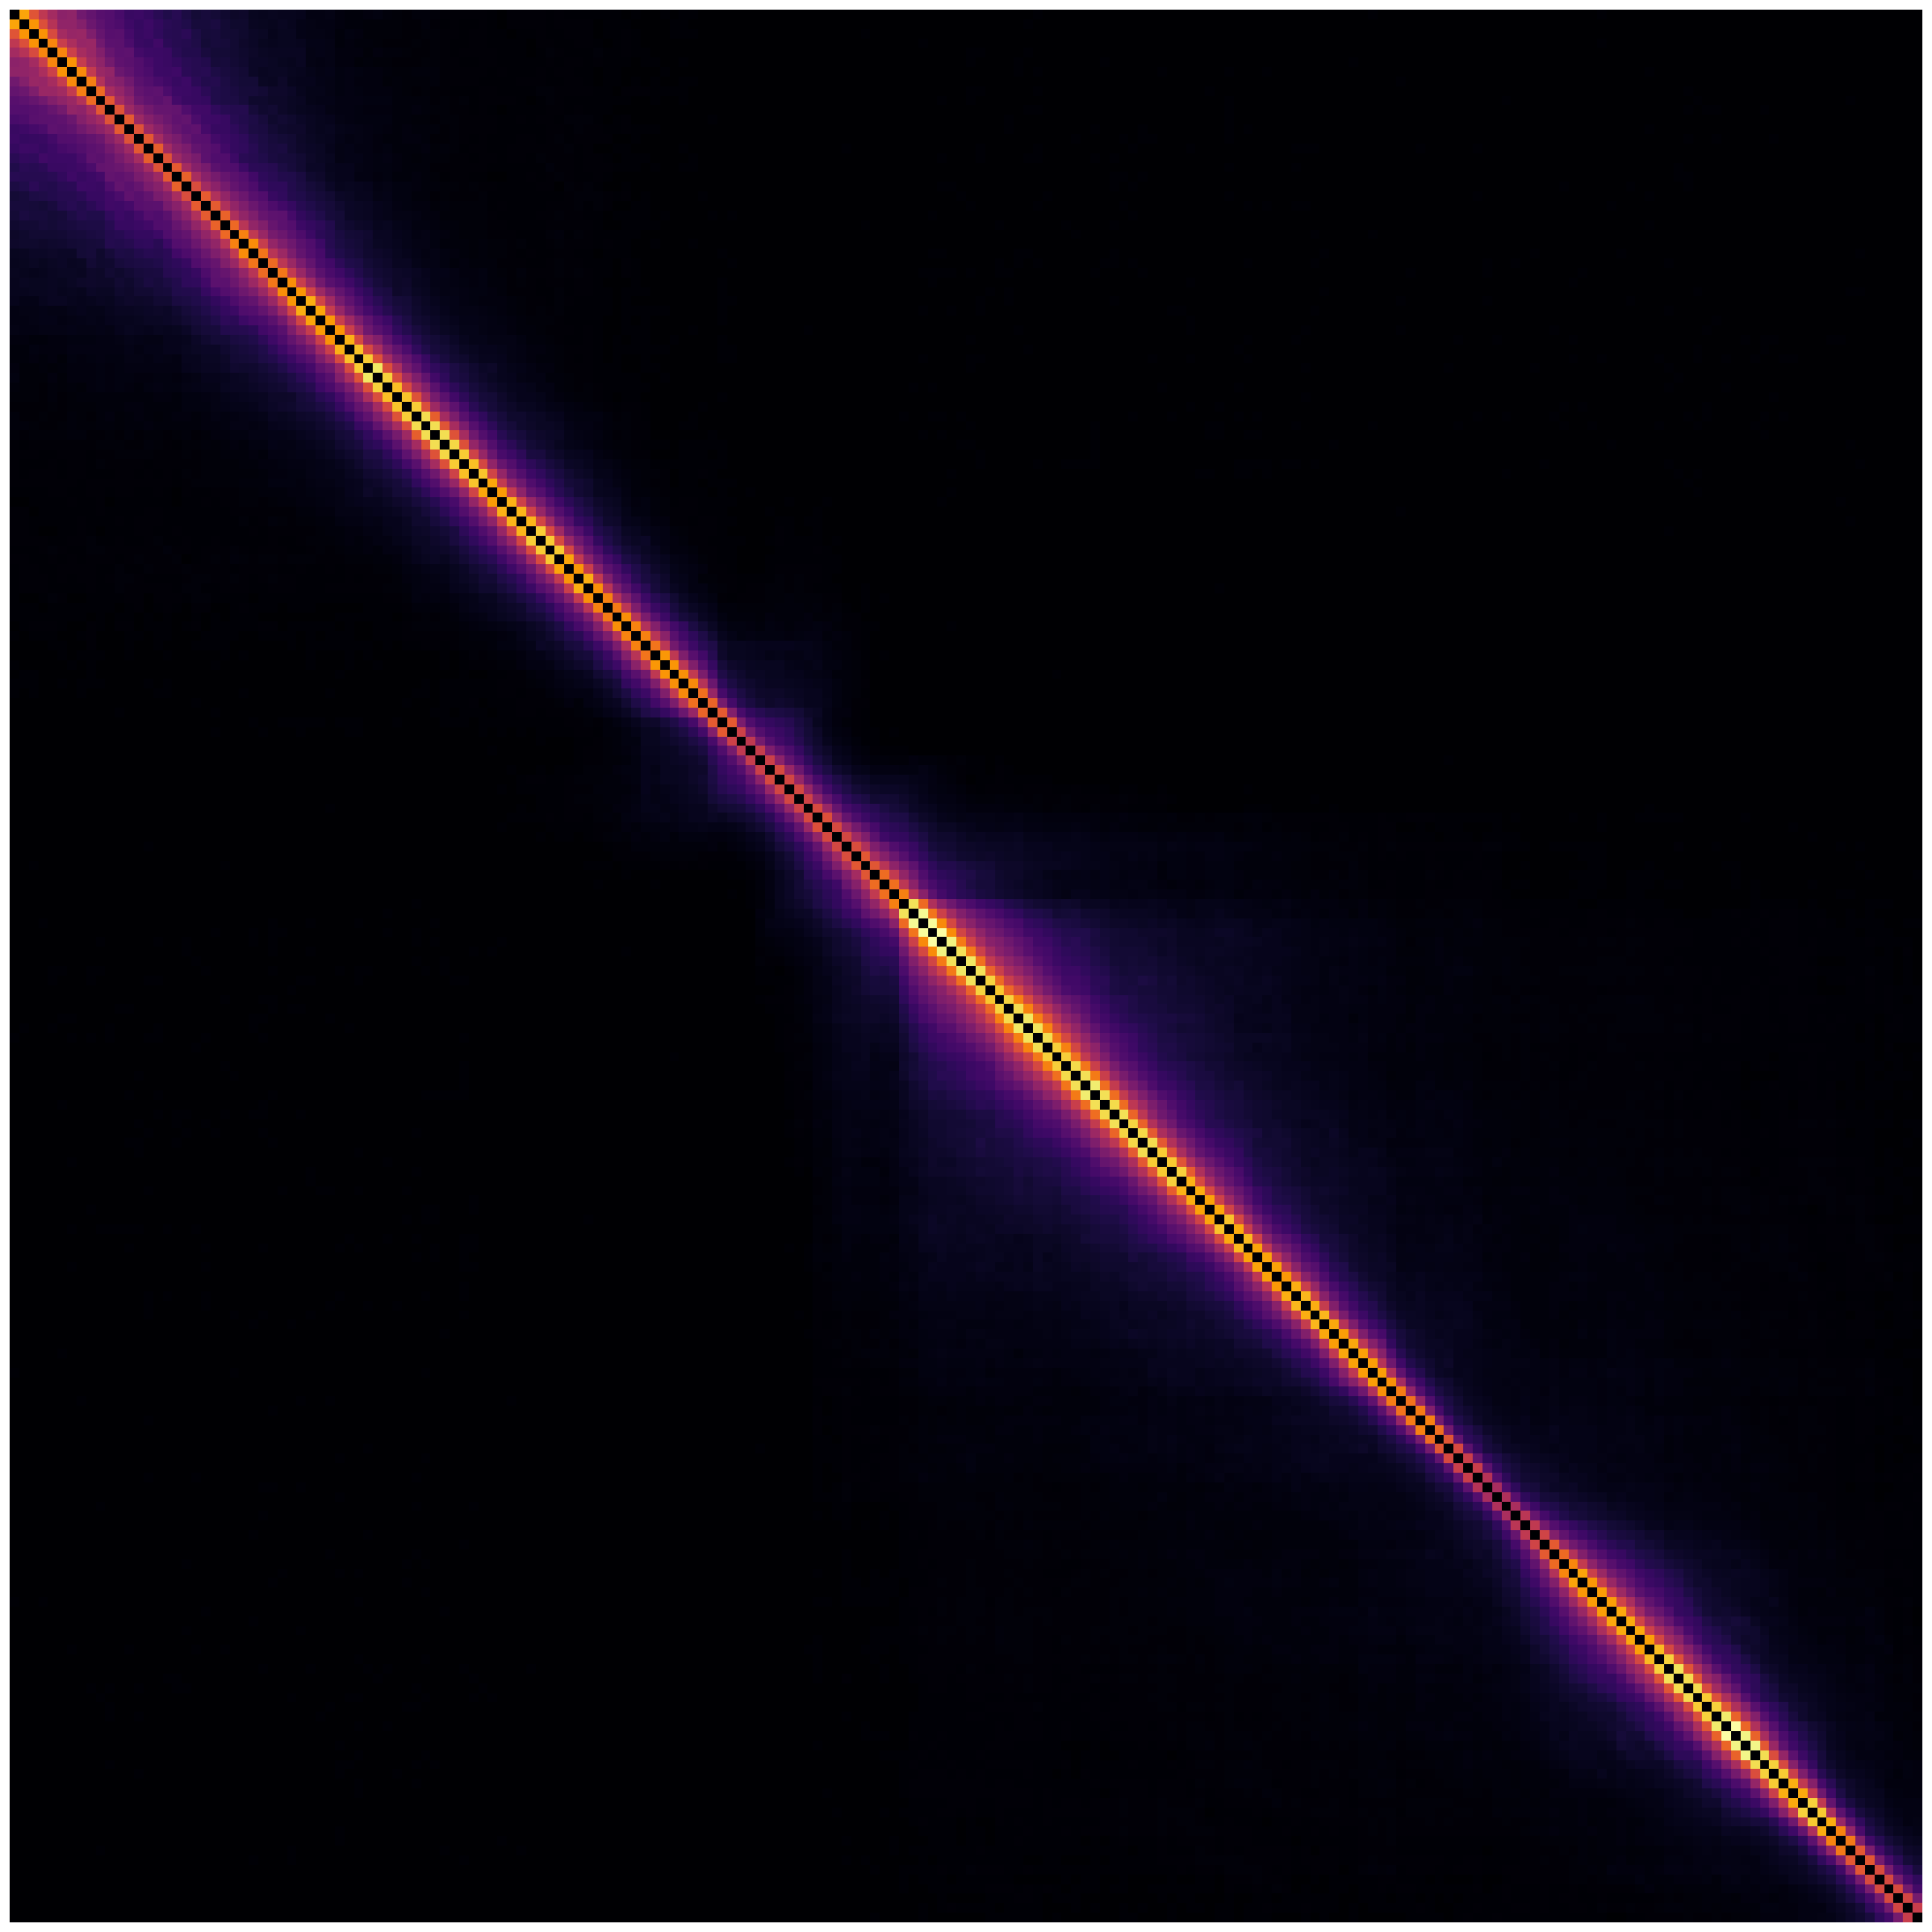

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个200行200列的全零矩阵
confusion_matrix = np.zeros((200, 200))

# 打开文本文件
with open('/home/yiheng/Surfel/dataset/colmap1/export.txt', 'r') as file:
    # 逐行读取文件内容
    for line in file:
        # 解析文件名和数值
        filename1, filename2, value = line.split()
        
        # 将文件名转换为对应的行索引和列索引
        row_index = int(filename1[:-4]) - 1
        col_index = int(filename2[:-4]) - 1
        
        # 将数值存储到混淆矩阵的相应位置
        confusion_matrix[row_index, col_index] = int(value)

# 补全矩阵
confusion_matrix = confusion_matrix + confusion_matrix.T - np.diag(confusion_matrix.diagonal())

plt.figure(figsize=(20, 20))
# 绘制热力图
plt.imshow(confusion_matrix, cmap='inferno')

# 关闭坐标轴显示
plt.axis('off')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()


In [228]:
np.save('confusion_matrix.npy', confusion_matrix)

In [229]:
!pwd

/home/yiheng/Projects/StableViewSynthesis


### raw_dataset process

In [57]:
len(values)

12

In [38]:
import numpy as np

# 读取文本文件
filename = '/home/yiheng/dataset/carla/carla_scene1_city/pose.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

# 转换每一行为R和t
rotation_matrices = []
translation_vectors = []

for line in lines:
    values = line.split()  # 按空格分割每个值

    # 提取旋转矩阵和平移向量
    r_values = [float(x) for x in values[:3]]  # 前三列是旋转矩阵R
    t_value = float(values[-1])  # 最后一列是平移向量t

    # 重塑为3x3矩阵
    rotation_matrix = np.reshape(r_values, (3, 1))
    translation_vector = np.array([t_value])

    # 添加到列表
    rotation_matrices.append(rotation_matrix)
    translation_vectors.append(translation_vector)

0.0005089663358220458 -0.001284942003358608 -0.9999990449382025 62.23046112060547 0.9999998700781741 2.8883452841598385e-05 0.000508929642193711 1.961643934249878 2.822948018210703e-05 -0.999999174044556 0.0012849565371217556 1.9979827404022217

[[0.0005089663358220458, -0.001284942003358608, -0.9999990449382025] 
[0.9999998700781741, 2.8883452841598385e-05, 0.000508929642193711]
[2.822948018210703e-05, -0.999999174044556, 0.0012849565371217556]] 

[62.23046112060547, 1.961643934249878, 1.9979827404022217]

In [34]:
import numpy as np

# 原始数据
data = [0.0005089663358220458, -0.001284942003358608, -0.9999990449382025,
        62.23046112060547, 0.9999998700781741, 2.8883452841598385e-05,
        0.000508929642193711, 1.961643934249878, 2.822948018210703e-05,
        -0.999999174044556, 0.0012849565371217556, 1.9979827404022217]

# 提取旋转矩阵R
rotation_matrix = np.array(data[:9]).reshape(3, 3)
print("Rotation matrix R:")
print(rotation_matrix)

# 提取平移向量t
translation_vector = np.array(data[9:])
print("Translation vector t:")
print(translation_vector)


Rotation matrix R:
[[ 5.08966336e-04 -1.28494200e-03 -9.99999045e-01]
 [ 6.22304611e+01  9.99999870e-01  2.88834528e-05]
 [ 5.08929642e-04  1.96164393e+00  2.82294802e-05]]
Translation vector t:
[-9.99999174e-01  1.28495654e-03  1.99798274e+00]


In [35]:
np.array(data).reshape(3, 4)[:, :3]

array([[ 5.08966336e-04, -1.28494200e-03, -9.99999045e-01],
       [ 9.99999870e-01,  2.88834528e-05,  5.08929642e-04],
       [ 2.82294802e-05, -9.99999174e-01,  1.28495654e-03]])

In [36]:
np.array(data).reshape(3, 4)[:, 3]

array([62.23046112,  1.96164393,  1.99798274])

In [121]:
import numpy as np

# 读取文本文件
filename = '/home/yiheng/Surfel/dataset/carla_vis_blank/pose.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

# 转换每一行为R和t
rotation_matrices = []
translation_vectors = []

for line in lines:
    values = np.array(line.split(), dtype=float)  # 按空格分割每个值
    matrix = values.reshape(3, 4)

    rotation_matrix = matrix[:, :3].tolist()
    translation_vector = matrix[:, 3].tolist()

    # 添加到列表
    rotation_matrices.append(rotation_matrix)
    translation_vectors.append(translation_vector)

rotation_matrices = np.array(rotation_matrices)
translation_vectors = np.array(translation_vectors)

In [126]:
print(data5[0], rotation_matrices[0])

[[ 0.99691859  0.00879406  0.07794859]
 [-0.00829108  0.99994268 -0.00677394]
 [-0.0780037   0.00610678  0.99693437]] [[ 1.30607315e-03 -1.71358598e-03 -9.99997679e-01]
 [ 9.99999146e-01  3.68590885e-05  1.30601191e-03]
 [ 3.46210393e-05 -9.99998531e-01  1.71363266e-03]]


In [127]:
print(data6[0], translation_vectors[0])

[-1.15893849 -0.45901755  3.91884407] [61.99692917  1.9644767   2.00170851]


In [128]:
np.save(generated_data_dic_path+'Rs.npy', rotation_matrices)

In [129]:
np.save(generated_data_dic_path+'ts.npy', translation_vectors)

In [122]:
data5.shape

(251, 3, 3)

In [124]:
translation_vectors.shape

(201, 3)

In [40]:
np.array(translation_vectors).shape

(192, 3)

In [137]:
generated_data_dic_path = "/home/yiheng/Projects/colmap_dic/training/Carla_blank/dense/ibr3d_pw_0.50/"
raw_dic_path = "/home/yiheng/Surfel/dataset/carla_vis_blank_raw/"

### depth_map transformer

In [70]:
depth_dic_path = raw_dic_path + "depth_2/"
print(depth_dic_path)

/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/


In [81]:
# 遍历原始数据集
for i in range(14, 215):
    # 原始图像文件名
    original_filename = "{:010d}.png".format(i)
    original_filepath = os.path.join(depth_dic_path, original_filename)

    # 新数据集文件名
    new_filename = "dm_{:08d}.npy".format(i - 14)
    new_filepath = os.path.join(generated_data_dic_path, new_filename)

    print(original_filepath, "----->>>>", new_filepath)

    # # 读取图像
    image = cv2.imread(original_filepath)
    depth_bgr = image.astype(np.float64)
    depth = depth_bgr[:,:,2] + depth_bgr[:,:,1]*256 + depth_bgr[:,:,0]*256*256
    depth = depth / (256 * 256 * 256 - 1)
    depth = depth * 1000                        # meter
    depth = np.clip(depth, 0, 60)

    # # 保存为.npy文件
    np.save(new_filepath, depth)

/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000014.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000000.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000015.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000001.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000016.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000002.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000017.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000003.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000018.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000004.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000019.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/dm_00000005.npy
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/depth_2/0000000020.png ----->>>> /home/yiheng/

### rgb_image transformer

In [69]:
rgb_dic_path = raw_dic_path + "image_2/"
print(rgb_dic_path)

/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/


In [83]:
# 遍历原始数据集
for i in range(14, 215):
    # 原始图像文件名
    original_filename = "{:010d}.png".format(i)
    original_filepath = os.path.join(rgb_dic_path, original_filename)

    # 新数据集文件名
    new_filename = "im_{:08d}.jpg".format(i - 14)
    new_filepath = os.path.join(generated_data_dic_path, new_filename)

    print(original_filepath, "----->>>>", new_filepath)

    # # 读取图像
    image = cv2.imread(original_filepath)

    # # 保存为.npy文件
    cv2.imwrite(new_filepath, image)

/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000014.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000000.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000015.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000001.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000016.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000002.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000017.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000003.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000018.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000004.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000019.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Carla_blank/im_00000005.jpg
/home/yiheng/Surfel/dataset/carla_vis_blank_raw/image_2/0000000020.png ----->>>> /home/yiheng/

In [134]:
import numpy as np

matrix_size = 201

# 创建一个全为1的矩阵
matrix = np.ones((matrix_size, matrix_size))

# 将对角线元素设置为0
np.fill_diagonal(matrix, 0)


In [138]:
np.save(generated_data_dic_path+'counts.npy', matrix)

## Check generated dataset

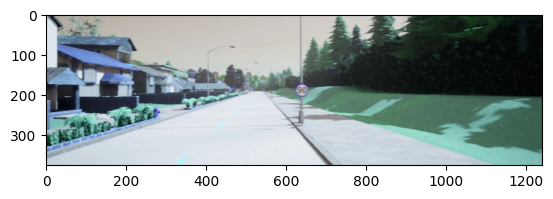

In [145]:
plt.imshow(image1)

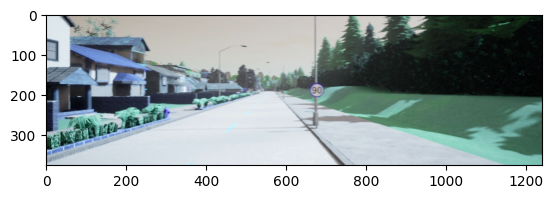

In [146]:
plt.imshow(image2)

重叠区域像素数量: 1380031


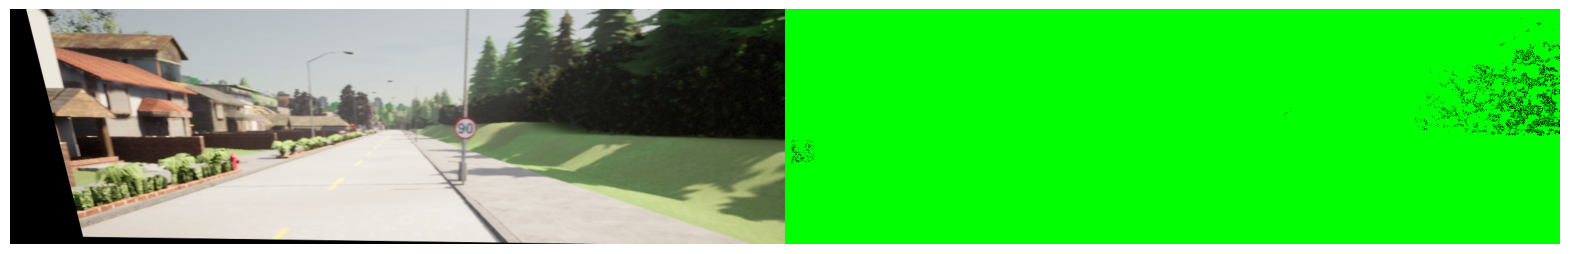

In [171]:
import cv2
import numpy as np

# 读取两张图片
frame1 = cv2.imread(generated_data_dic_path+'im_00000092.jpg')
frame2 = cv2.imread(generated_data_dic_path+'im_00000099.jpg')

# 转换为灰度图像
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# 创建SIFT特征提取器
sift = cv2.SIFT_create()

# 检测关键点和计算描述符
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# 创建FLANN匹配器
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 特征匹配
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# 进行比率测试，筛选出好的匹配点
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 提取关键点的坐标
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 计算单应性矩阵
H, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

# 获取第一张图片的宽度和高度
h1, w1 = frame1.shape[:2]

# 使用单应性矩阵将第一张图片投影到第二张图片上
warped_image = cv2.warpPerspective(frame1, H, (w1, h1))

# 将两张图片合并为一张图片
combined_image = np.concatenate((warped_image, frame2), axis=1)

# 计算重叠区域像素数量
overlap_pixels = np.sum(combined_image[:, w1:] > 0)

print("重叠区域像素数量:", overlap_pixels)

# 在两张图片上绘制重叠区域
result = combined_image.copy()
result[:, w1:, :] = np.where(result[:, w1:, :] > 0, [0, 255, 0], result[:, w1:, :])

plt.figure(figsize=(20, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [165]:
frame1.shape

(376, 1241, 3)

In [166]:
376 * 1241

466616

### COLMAP 转四元数
IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME

In [172]:
!pwd

/home/yiheng/Projects/StableViewSynthesis


In [197]:
import numpy as np

# 读取文本文件
filename = '/home/yiheng/Surfel/dataset/carla_vis_blank/pose.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

# 转换每一行为R和t
rotation_matrices = []
translation_vectors = []

for line in lines:
    values = np.array(line.split(), dtype=float)  # 按空格分割每个值
    matrix = values.reshape(3, 4)

    rotation_matrix = matrix[:, :3].tolist()
    translation_vector = matrix[:, 3].tolist()

    # 添加到列表
    rotation_matrices.append(rotation_matrix)
    translation_vectors.append(translation_vector)

rotations = np.array(rotation_matrices)
translations = np.array(translation_vectors)

In [190]:
quaternions = [quaternion.from_rotation_matrix(rot) for rot in rotations]

In [207]:
import numpy as np
import quaternion

# 将旋转矩阵转换为四元数
quaternions = np.zeros((len(rotations), 4))
for i, rotation_matrix in enumerate(rotations):
    quat = quaternion.from_rotation_matrix(rotation_matrix)
    quaternions[i] = quaternion.as_float_array(quat)

# 生成IMAGE_ID和CAMERA_ID
image_ids = np.arange(len(quaternions))
camera_ids = np.ones(len(quaternions), dtype=int)  # 将所有camera_id设置为1

# 定义NAME
names = [f"{i:010d}.png" for i in range(len(quaternions))]

# 将数据写入txt文件
output_filename = '/home/yiheng/Surfel/dataset/carla_vis_blank/output.txt'
with open(output_filename, 'w') as file:
    for image_id, quaternion, translation, camera_id, name in zip(image_ids, quaternions, translations, camera_ids, names):
        qw, qx, qy, qz = quaternion
        tx, ty, tz = translation
        file.write(f"{image_id} {qw} {qx} {qy} {qz} {tx} {ty} {tz} {camera_id} {name}\n\n")

print("转换完成并已写入output.txt文件。")


转换完成并已写入output.txt文件。
